In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("C://Users/sampa/ai_class/data_files\AAME.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.0,4.05,3.85,3.85,3.213167,15000
1,1980-03-18,0.0,4.00,3.80,3.80,3.171437,10200
2,1980-03-19,0.0,4.05,3.85,3.85,3.213167,33500
3,1980-03-20,0.0,4.00,3.80,3.80,3.171437,8700
4,1980-03-21,0.0,3.95,3.75,3.75,3.129709,12700


In [3]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [4]:
df = df.drop(columns=['Date', 'Adj Close', 'Volume'])
df.head()

,Open,High,Low,Close
0,0.0,4.05,3.85,3.85
1,0.0,4.00,3.80,3.80
2,0.0,4.05,3.85,3.85
3,0.0,4.00,3.80,3.80
4,0.0,3.95,3.75,3.75


In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
scaled = scaler.fit_transform(df)
scaled

array([[0.        , 0.23515054, 0.2312812 , 0.22213181],
       [0.        , 0.23189585, 0.22795341, 0.21887713],
       [0.        , 0.23515054, 0.2312812 , 0.22213181],
       ...,
       [0.16304348, 0.1179821 , 0.11680534, 0.11017088],
       [0.15289854, 0.10886899, 0.11547421, 0.10886899],
       [0.15289854, 0.11147275, 0.11547421, 0.11147275]])

In [6]:
int(len(scaled) * 0.8)

8078

In [7]:
int(len(scaled)) - int(len(scaled) * 0.8)

2020

In [8]:
len(scaled) == int(len(scaled) * 0.8) + int(len(scaled)) - int(len(scaled) * 0.8)

True

In [9]:
TEST_SIZE = 2020

train_data = scaled[:-TEST_SIZE]
test_data = scaled[-TEST_SIZE:]

print(len(train_data))
print(len(test_data))

8078
2020


In [10]:
def make_sample(data, window):
    train = []
    target = []
    for i in range(len(data)-window):
        train.append(data[i:i+window])
        target.append(data[i+window][3])
    return np.array(train), np.array(target).reshape(-1, 1)

X_train, y_train = make_sample(train_data, 30)

In [11]:
print(X_train.shape)
print(y_train.shape)

(8048, 30, 4)
(8048, 1)


In [12]:
model = Sequential()
model.add(LSTM(16,
               input_shape=(X_train.shape[1], 4),
               activation='tanh',
               return_sequences=False)
         )
model.add(Dense(1))

In [13]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [14]:
model.fit(X_train, y_train, epochs=100, batch_size=16)

Epoch 1/100

503/503 [==============================] - 5s 7ms/step - loss: 0.0054
Epoch 2/100
503/503 [==============================] - 3s 7ms/step - loss: 2.4247e-04
Epoch 3/100
503/503 [==============================] - 3s 7ms/step - loss: 1.9378e-04
Epoch 4/100
503/503 [==============================] - 4s 7ms/step - loss: 1.7110e-04
Epoch 5/100
503/503 [==============================] - 3s 7ms/step - loss: 1.5018e-04
Epoch 6/100
503/503 [==============================] - 3s 7ms/step - loss: 1.4315e-04
Epoch 7/100
503/503 [==============================] - 3s 7ms/step - loss: 1.2769e-04
Epoch 8/100
503/503 [==============================] - 4s 7ms/step - loss: 1.2326e-04
Epoch 9/100
503/503 [==============================] - 4s 7ms/step - loss: 1.1289e-04
Epoch 10/100
503/503 [==============================] - 4s 8ms/step - loss: 1.1491e-04
Epoch 11/100
503/503 [==============================] - 4s 8ms/step - loss: 1.0432e-04
Epoch 12/100
503/503 [==============================] -

In [15]:
X_test, y_test = make_sample(test_data, 30)
pred = model.predict(X_test)

63/63 [==============================] - 1s 5ms/step


In [16]:
y_test

array([[0.15964199],
       [0.15964199],
       [0.16029293],
       ...,
       [0.11017088],
       [0.10886899],
       [0.11147275]])

In [17]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, pred)
print(mse)

4.367410042667848e-05


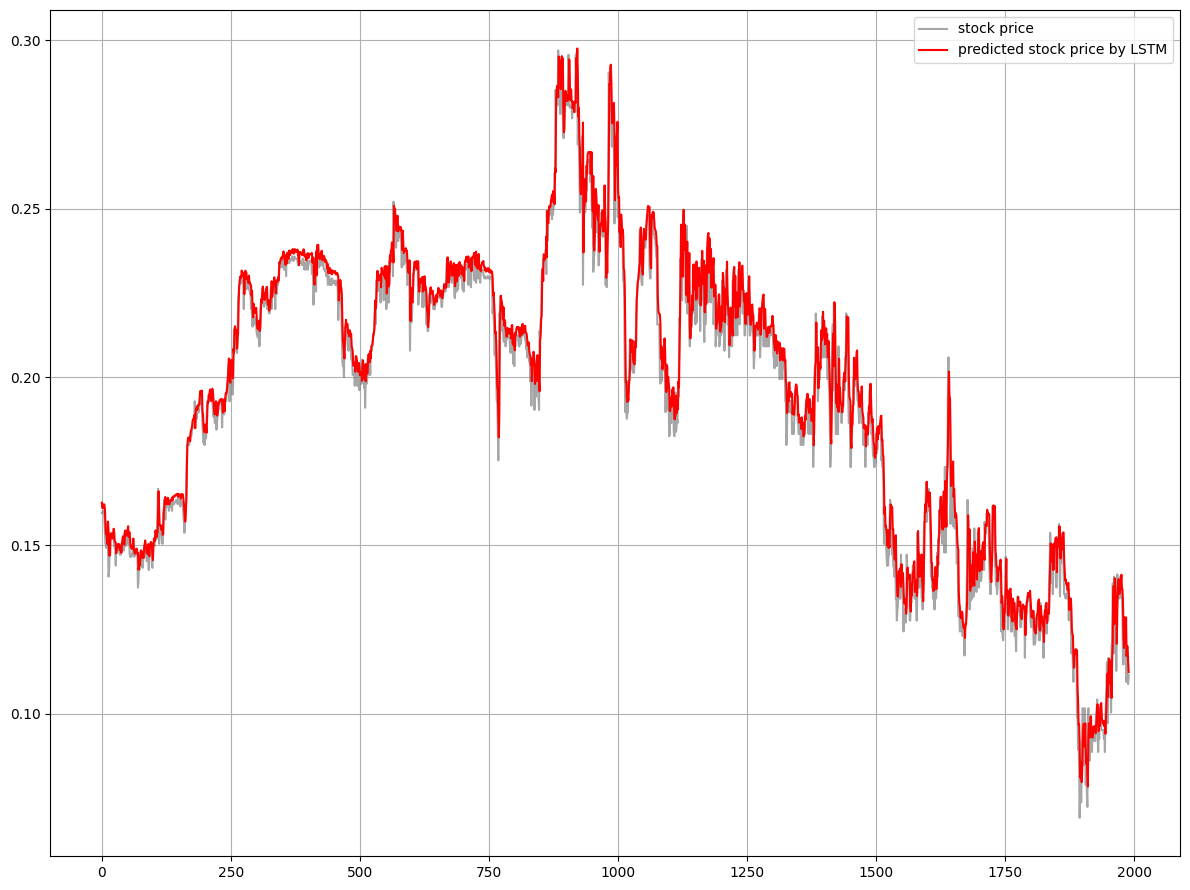

In [23]:
plt.figure(figsize=(12, 9))
plt.plot(y_test, label='stock price', alpha=0.7, color='gray')
plt.plot(pred, label='predicted stock price by LSTM', color='red')
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()